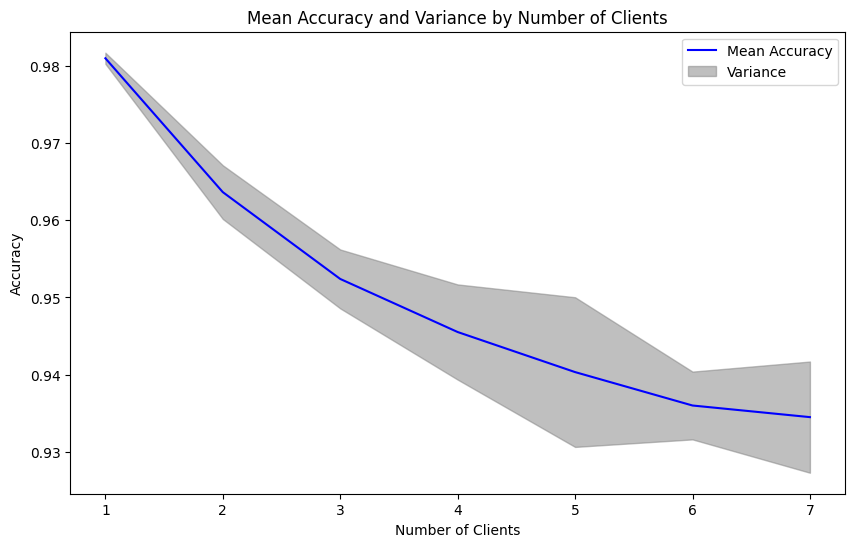

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from a CSV file
data = pd.read_csv('results/mono_vs_federated copy.txt', header=None)

# Extract the number of clients and accuracies
num_clients = data[0]
accuracies = data.iloc[:, 1:]

# Calculate the mean and variance for each number of clients
mean_accuracies = accuracies.mean(axis=1)
variance_accuracies = accuracies.var(axis=1)

# Group by the number of clients
grouped_means = mean_accuracies.groupby(num_clients).mean()
grouped_variances = variance_accuracies.groupby(num_clients).mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot mean accuracy
plt.plot(grouped_means.index, grouped_means, label='Mean Accuracy', color='blue')

# Plot variance as grey background
plt.fill_between(grouped_means.index, 
                 grouped_means - np.sqrt(grouped_variances), 
                 grouped_means + np.sqrt(grouped_variances), 
                 color='grey', alpha=0.5, label='Variance')

plt.xlabel('Number of Clients')
plt.ylabel('Accuracy')
plt.title('Mean Accuracy and Variance by Number of Clients')
plt.legend()

# Save the plot as a PDF
plt.savefig('plots/accuracy_plot.pdf')

plt.show()